#Visualización de datos

##Ejercicio 1




Utilizando $\texttt{seaborn.objects}$ graficar la curva de la expectativa de vida en Argentina en función del año.

In [3]:
pip install gapminder

In [4]:
from gapminder import gapminder
import seaborn.objects as so

In [5]:
datosArgentina=gapminder[gapminder["country"]=="Argentina"]
datosArgentina

country continent  year  lifeExp       pop     gdpPercap
48  Argentina  Americas  1952   62.485  17876956   5911.315053
49  Argentina  Americas  1957   64.399  19610538   6856.856212
50  Argentina  Americas  1962   65.142  21283783   7133.166023
51  Argentina  Americas  1967   65.634  22934225   8052.953021
52  Argentina  Americas  1972   67.065  24779799   9443.038526
53  Argentina  Americas  1977   68.481  26983828  10079.026740
54  Argentina  Americas  1982   69.942  29341374   8997.897412
55  Argentina  Americas  1987   70.774  31620918   9139.671389
56  Argentina  Americas  1992   71.868  33958947   9308.418710
57  Argentina  Americas  1997   73.275  36203463  10967.281950
58  Argentina  Americas  2002   74.340  38331121   8797.640716
59  Argentina  Americas  2007   75.320  40301927  12779.379640

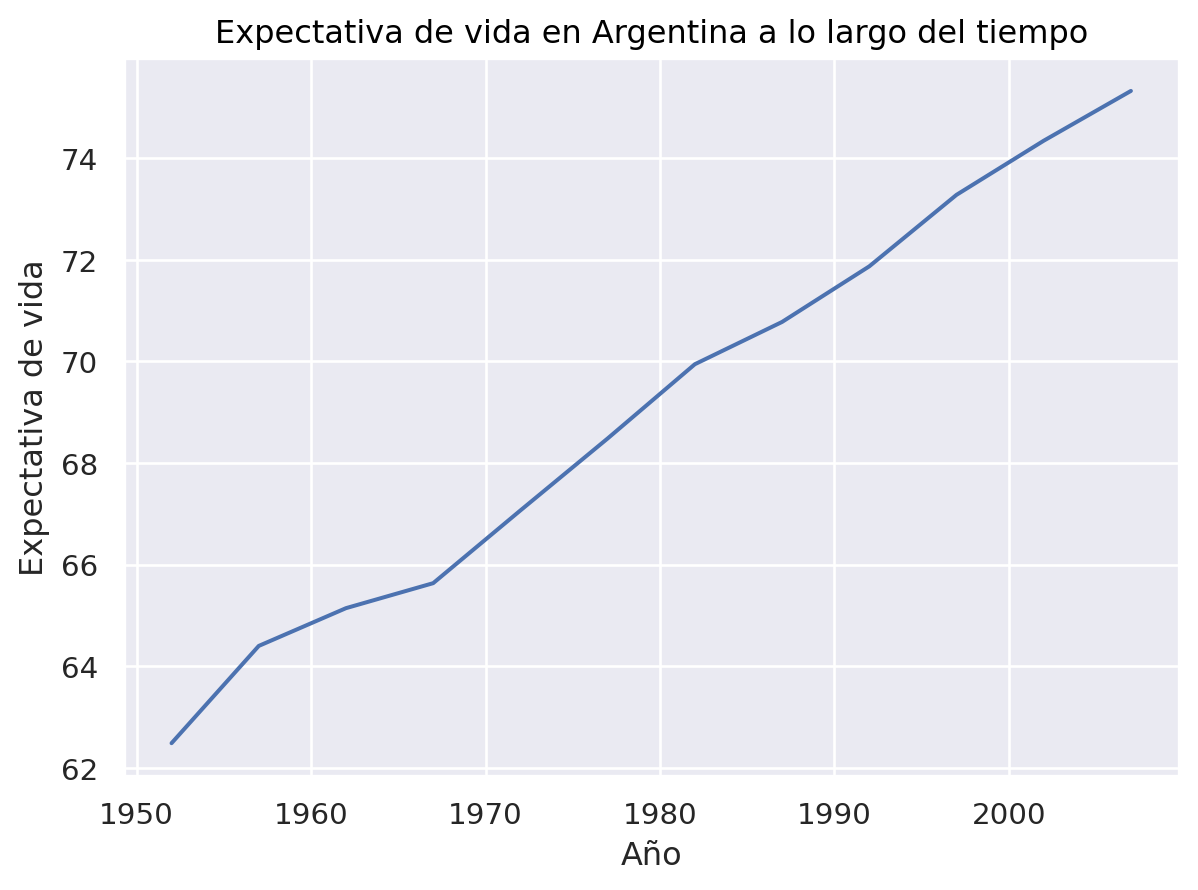

In [37]:
(
    so.Plot(data = datosArgentina, x="year", y="lifeExp")
    .add(so.Line())
).label(x="Año",y="Expectativa de vida",title="Expectativa de vida en Argentina a lo largo del tiempo")

In [ ]:
datosAmerica = gapminder[gapminder["continent"]=="Americas"]
datosAmerica

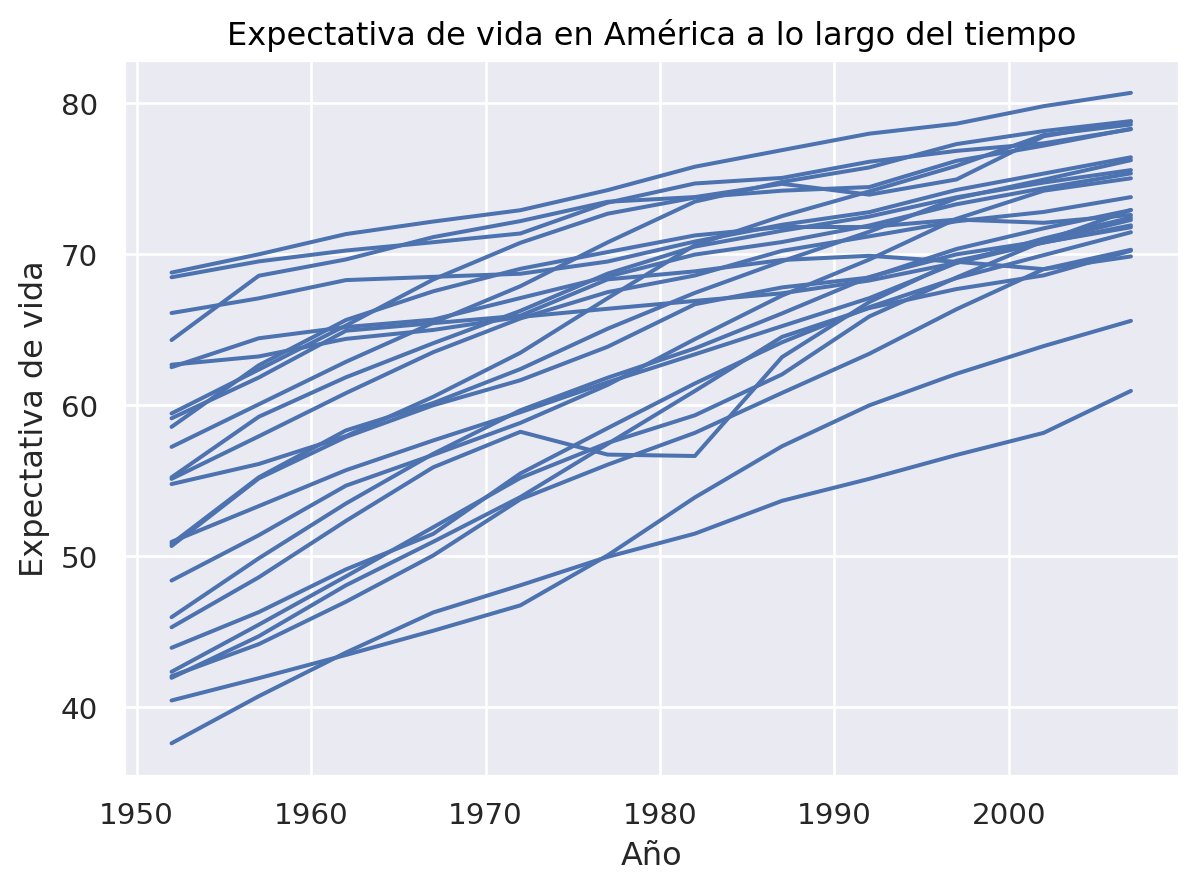

In [ ]:
(
    so.Plot(data = datosAmerica, x="year", y="lifeExp",group="country")
    .add(so.Line())
).label(x="Año",y="Expectativa de vida",title="Expectativa de vida en América a lo largo del tiempo")

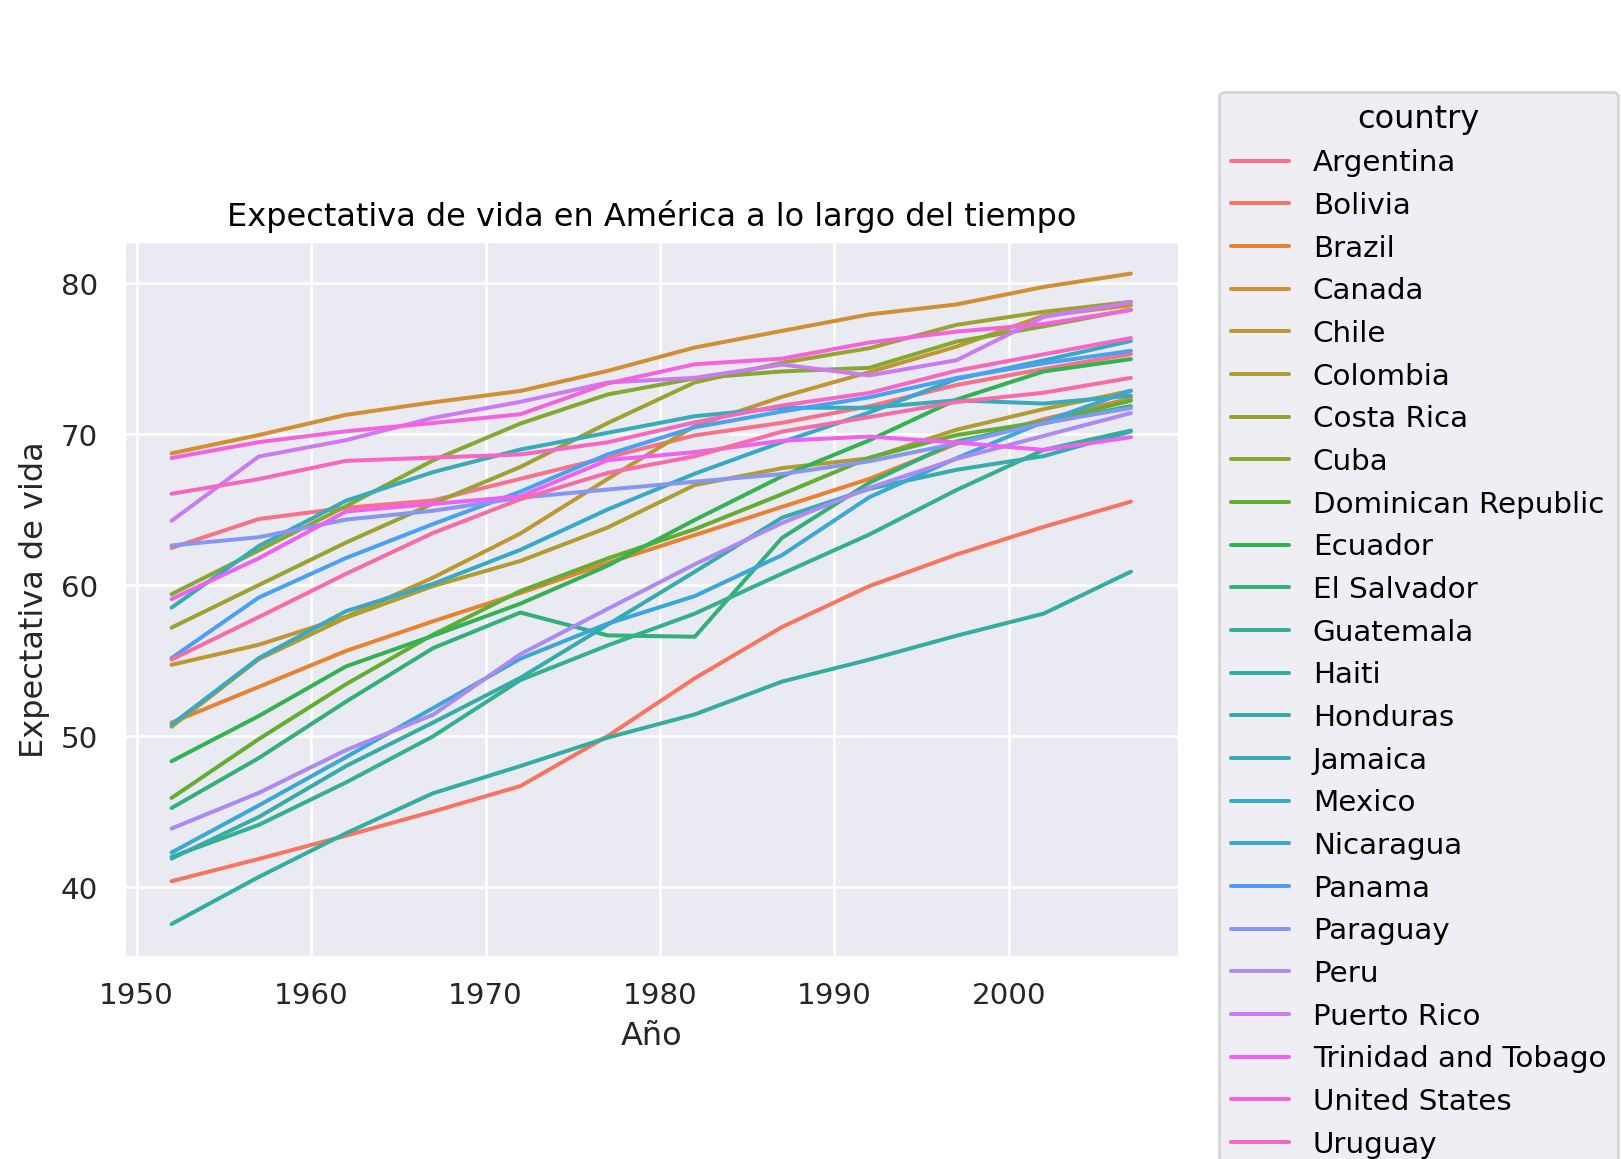

In [ ]:
(
    so.Plot(data = datosAmerica, x="year", y="lifeExp",color="country")
    .add(so.Line())
).label(x="Año",y="Expectativa de vida",title="Expectativa de vida en América a lo largo del tiempo")

Queremos agregar al gráfico del item anterior una curva de tendencia lineal utilizando $\texttt{.add(so.Line(),so.PolyFit(1))}$

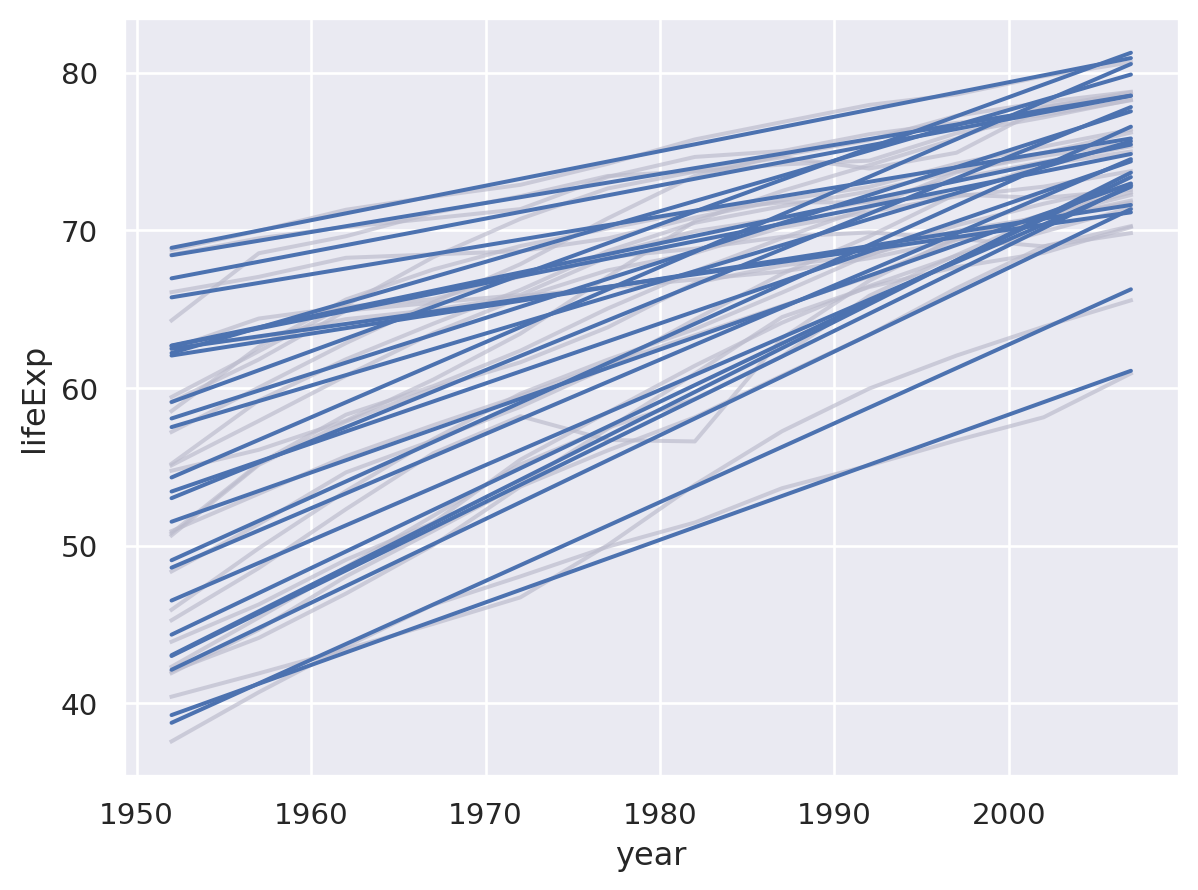

In [ ]:
#Código 1
(
    so.Plot(data=datosAmerica, x="year",y="lifeExp",group="country")
    .add(so.Lines(color="#bbca"))
    .add(so.Line(),so.PolyFit(1))
)

En el primer código no se entiende nada

In [ ]:
#Código 2
(
    so.Plot(data=datosAmerica, x="year", y="lifeExp")
    .add(so.Lines(color="#bbca"),group="country")
    .add(so.Line(),so.PolyFit(1))
)

Este es el gráfico que buscabamos, el problema era que solo queríamos agrupar por pais a las lineas grises, no al ajuste polinomial

Busquemos ahora hacer las de todos los continentes

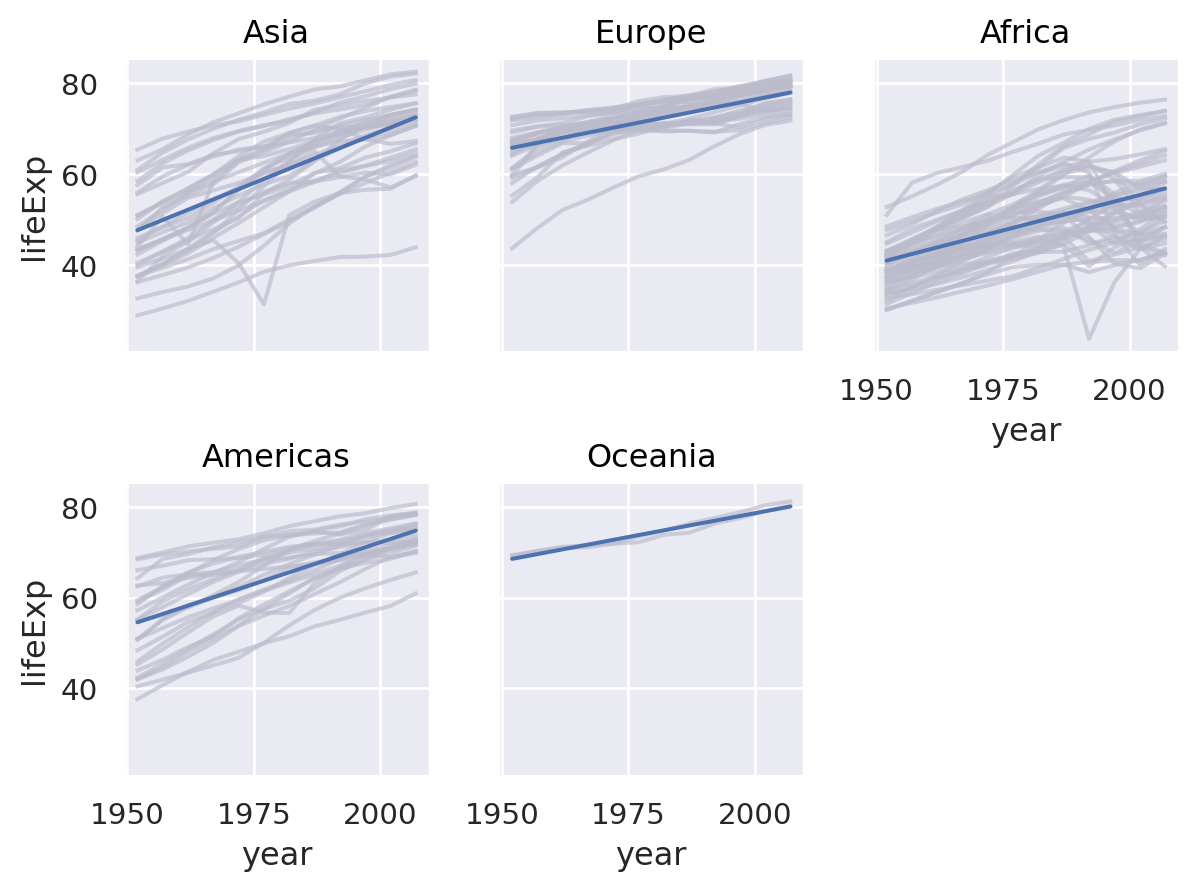

In [ ]:
(
    so.Plot(gapminder,"year","lifeExp")
    .add(so.Lines(color="#bbca"),group="country")
    .add(so.Line(),so.PolyFit(1))
).facet("continent",wrap=3)

## Ejercicio 2

Vamos a trabajar con el dataset $\texttt{penguins}$

In [6]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

## Ejercicio 3

Si asignamos una codificación (o mapeo) al definir un Plot(), el mapeo se asigna en todas las capas de marcas (objetos mark). En cambio, si asignamos una codificación dentro de add() de una marca, el mapeo se realiza solo en esa capa. Por último, si asignamos un parámetro de la marca, el valor se asigna directamente

¿Qué esperamos del siguiente gráfico?

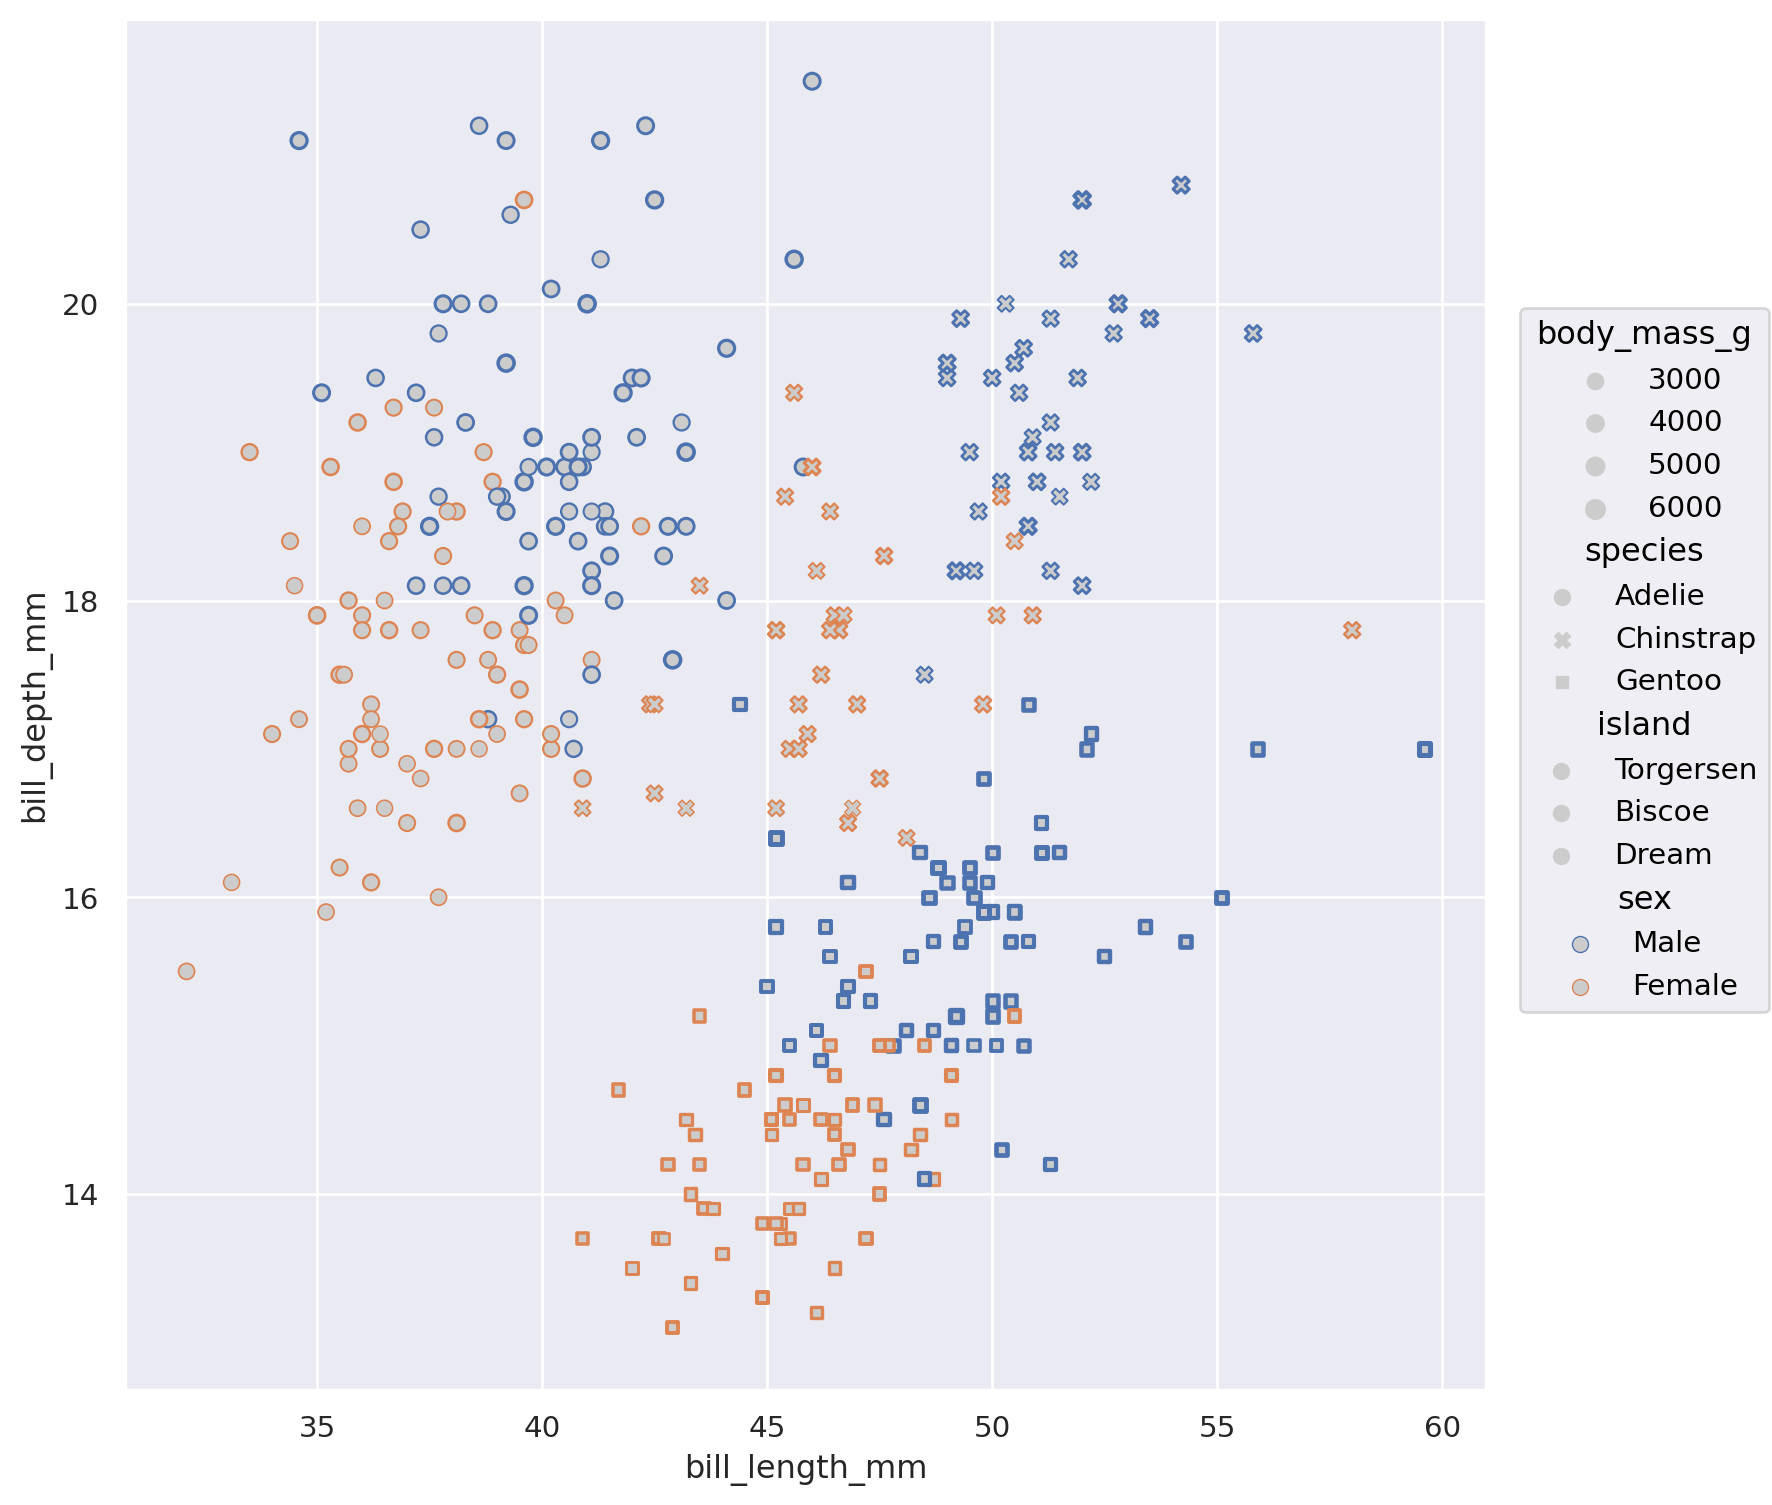

In [ ]:
(
    so.Plot(
        penguins,x="bill_length_mm",y="bill_depth_mm",
        edgewidth="body_mass_g", marker="species",
        linestyle="island",color="species"
    )
    .add(so.Dot(color=".8"),edgecolor="sex")
).layout(size=(8,8))

Asignamos como eje x, la longitud del pico, y como eje y, la profundidad del mismo. Luego, el tamaño de los dots, depende de la masa del pinguino. La forma del punto depende de la especie, el color nos indica el sexo del pinguino.

Para lo de las islas, averigue y parece que hace las lineas punteadas o no, pero en nuestro gráfico, creo que es casi imposible de distinguir (creo que hace punteadas o no las lineas de los bordes

## Ejercicio 4


Un gráfico de dispersión de bill_depth_mm vs bill_length_mm

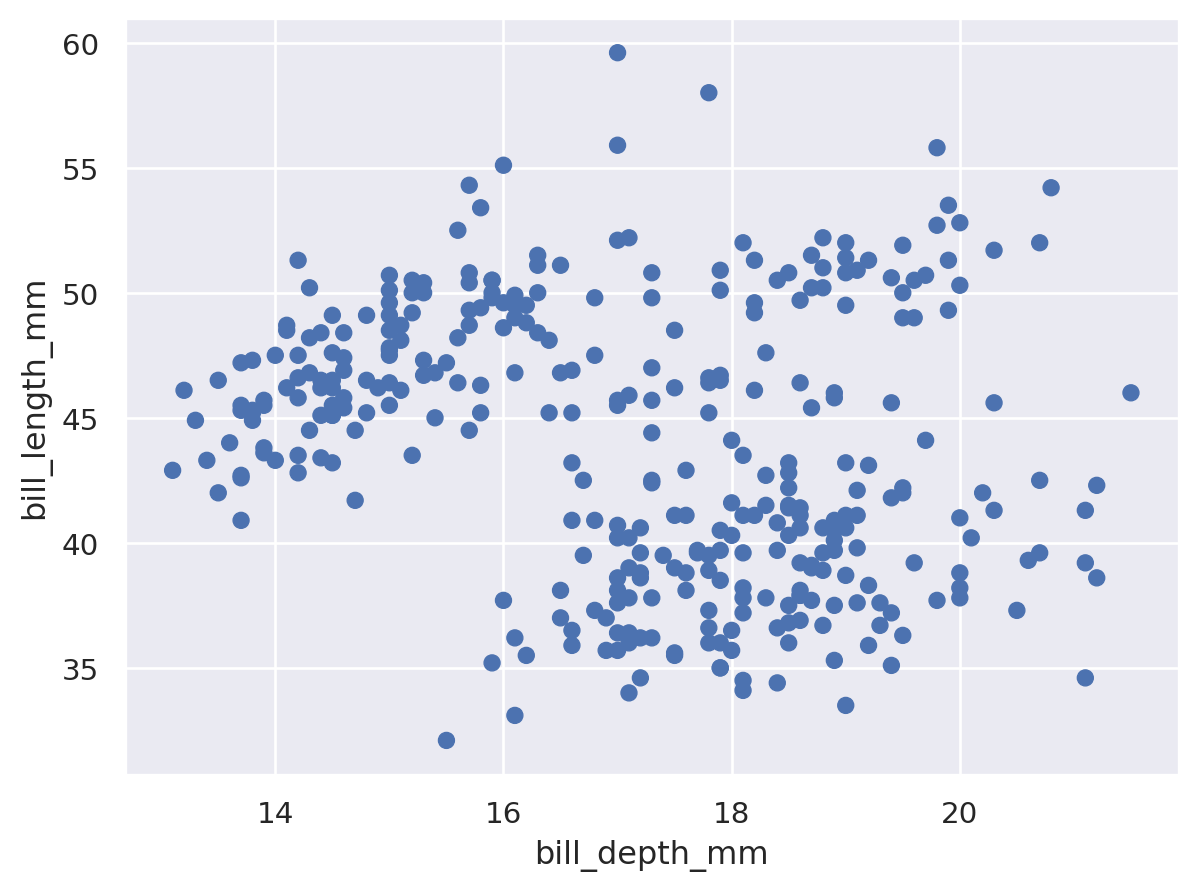

In [ ]:
(
    so.Plot(penguins,"bill_depth_mm","bill_length_mm")
    .add(so.Dot())
)

Veo distintos grupos, sospecho que se puede deber a que son de distinta especie

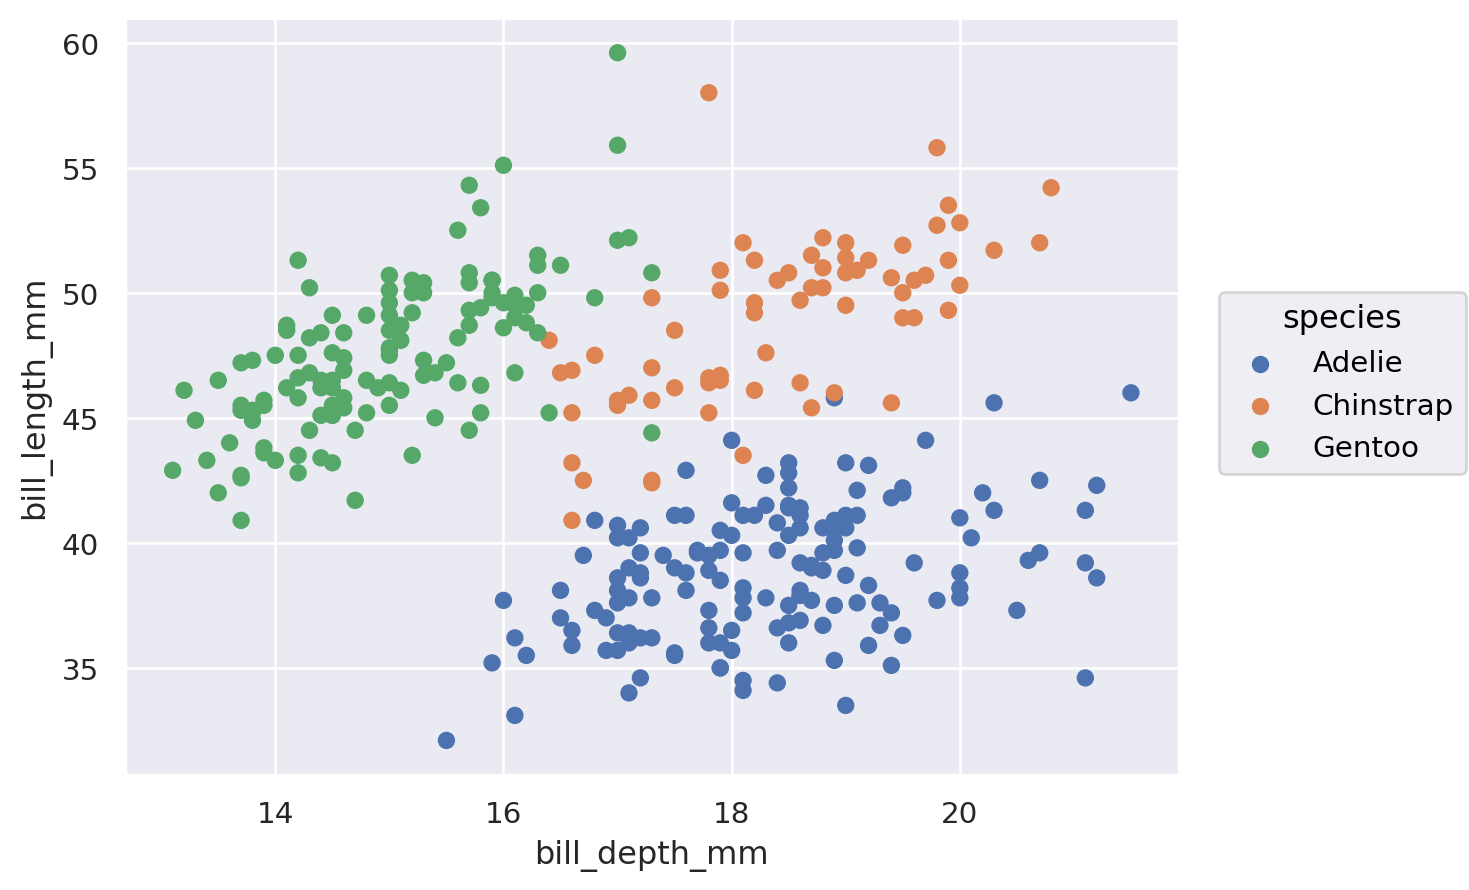

In [ ]:
(
    so.Plot(penguins,"bill_depth_mm","bill_length_mm",color="species")
    .add(so.Dot())
)

Confirmadisimo, jajaj

## Ejercicio 5
Agrupar ahora por sexo

In [ ]:
(
    so.Plot(penguins,"bill_depth_mm","bill_length_mm",color="sex")
    .add(so.Dot())
)

Parece que los machos, tienen, en promedio, picos mas grandes que las hembras

Dividir ahora, el gráfico, en uno para cada una de las 3 especies

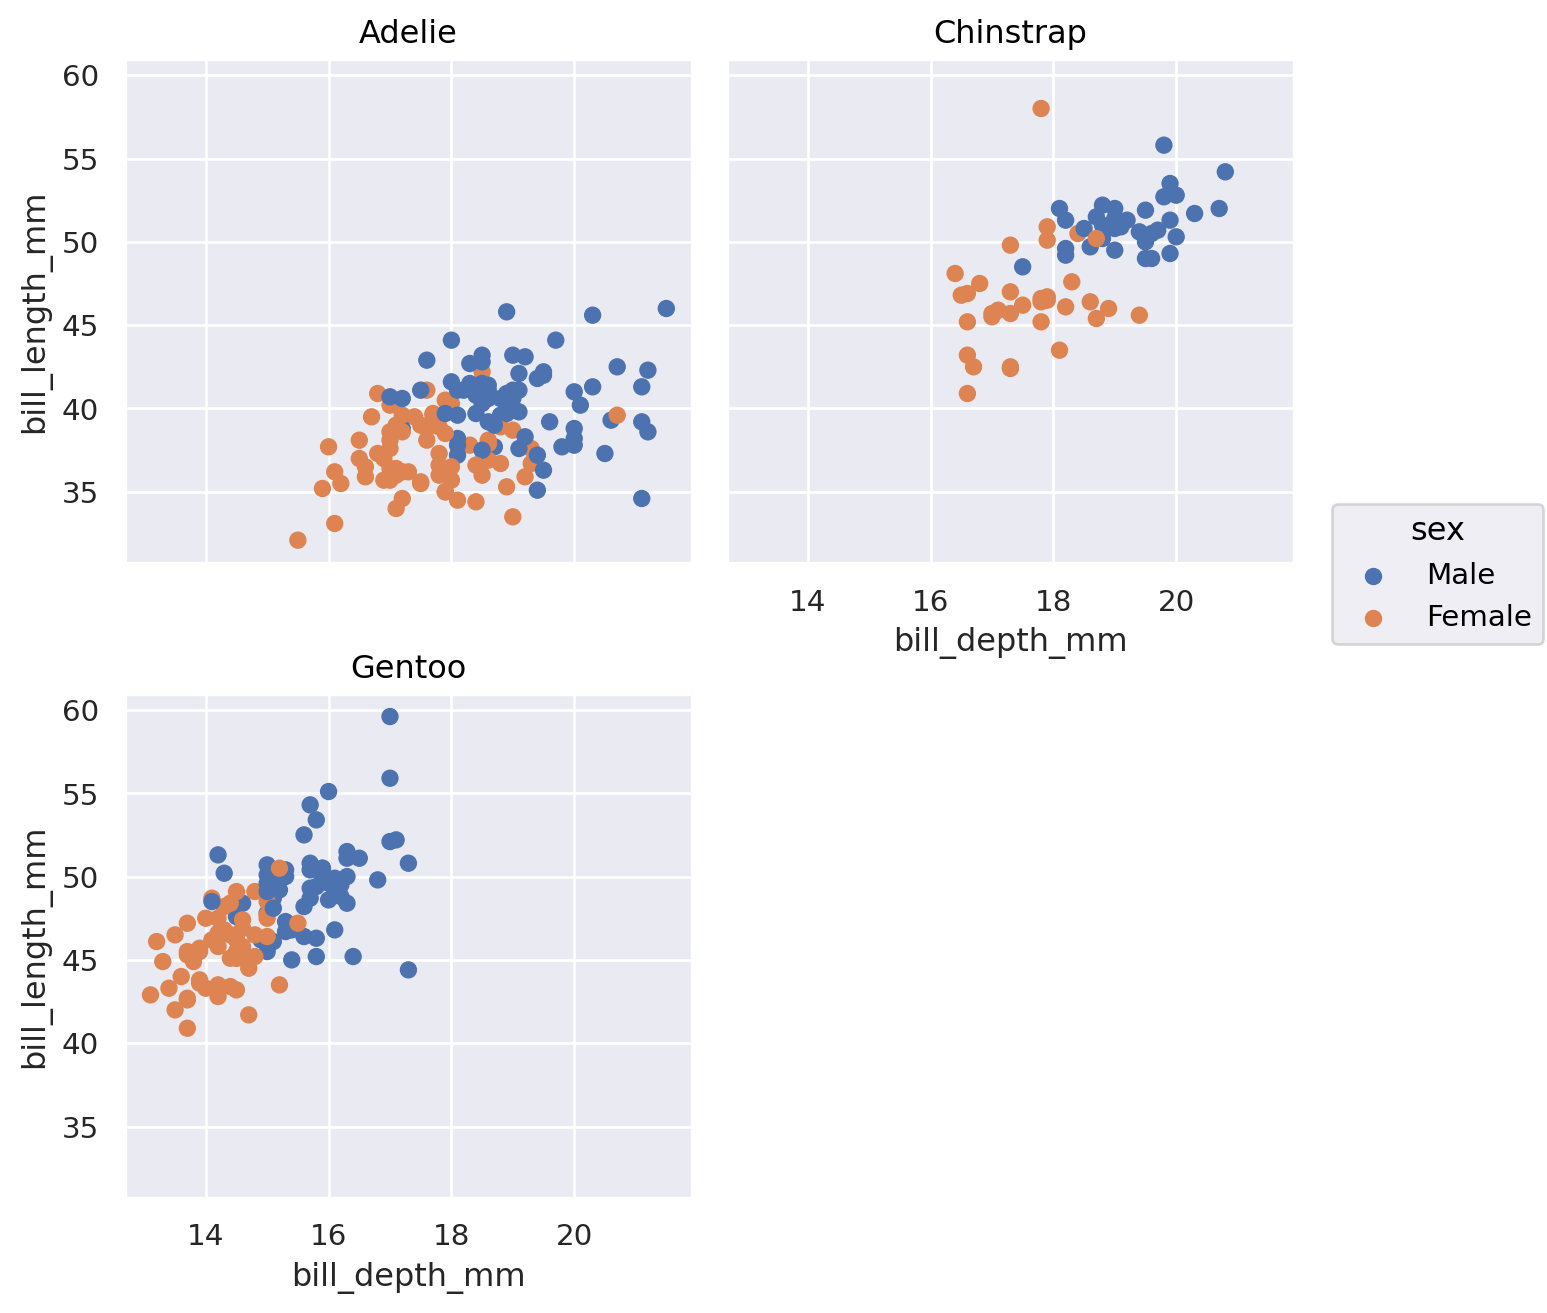

In [ ]:
(
    so.Plot(penguins,"bill_depth_mm","bill_length_mm",color="sex")
    .add(so.Dot())
).facet("species",wrap=2).layout(size=(7,7))

## Ejercicio 6
¿Cuántos pinguinos hay en cada isla de la base de datos? Recordar los comandos groupby() y size() de la práctica anterior

In [ ]:
penguins.groupby("island").size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

Realizar un gráfico de pinguinos por isla

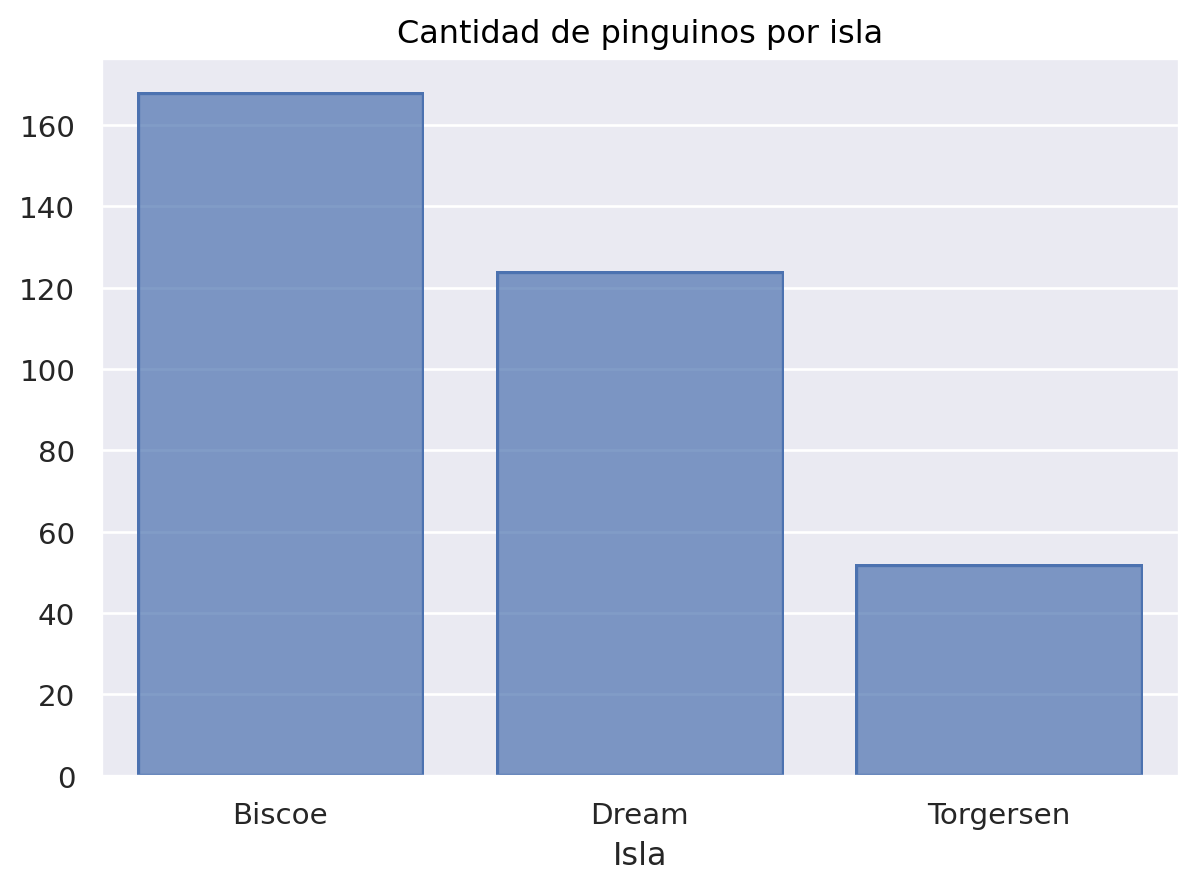

In [ ]:
pinguinos_por_isla = penguins.groupby("island").size()

(
    so.Plot(x=pinguinos_por_isla.index,y=pinguinos_por_isla.array)
    .add(so.Bar())
).label(x="Isla",title="Cantidad de pinguinos por isla")

El gráfico que acabamos de hacer es un histograma categórico (usamos una variable categórica en el eje x). Podemos realizar el mismo gráfico usando la función Hist() para contar automáticamente las cantidades (sin definir pinguinos_por_isla)

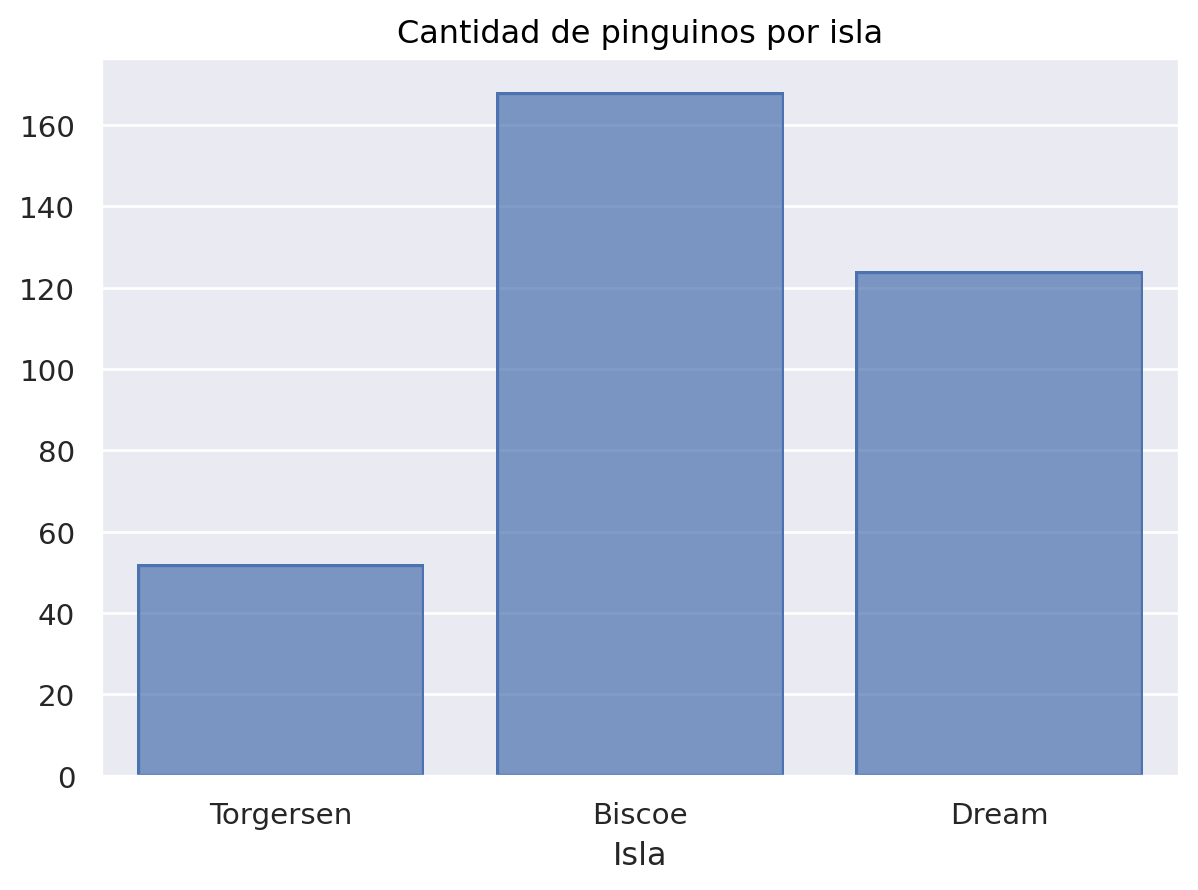

In [ ]:
(
    so.Plot(data=penguins,x="island")
    .add(so.Bar(),so.Hist())
).label(x="Isla",title="Cantidad de pinguinos por isla")

No especificamos variable y, precisamente porque no la hay, lo que juega el rol de variable y acá es la cantidad del registros del DataSet, y no alguna columna del mismo

Queremos ver en un gráfico cuántos pinguinos de cada especie hay en cada isla, ¿cómo podemos hacerlo? Si usan un gráfico de barras, pueden utilizar la función dodge() para hacer varias barras por categoría

In [ ]:
(
    so.Plot(data=penguins,x="island",color="species")
    .add(so.Bar(),so.Hist(),so.Dodge())
).label(x="Isla y Especie",title="Cantidad de pinguinos de cada especie por isla")

Podriamos hacer algo parecido usando facet()

In [ ]:
(
    so.Plot(data=penguins,x="species")
    .add(so.Bar(),so.Hist())
).facet("island",wrap=2).layout(size=(6,6))

## Ejercicio 7
Realizar un histograma de la cantidad de pinguinos en funcion del tamaño del ala (variable flipper_length_mm)
A partir del gráfico, estimar el valor mínimo, máximo, la media y la mediana

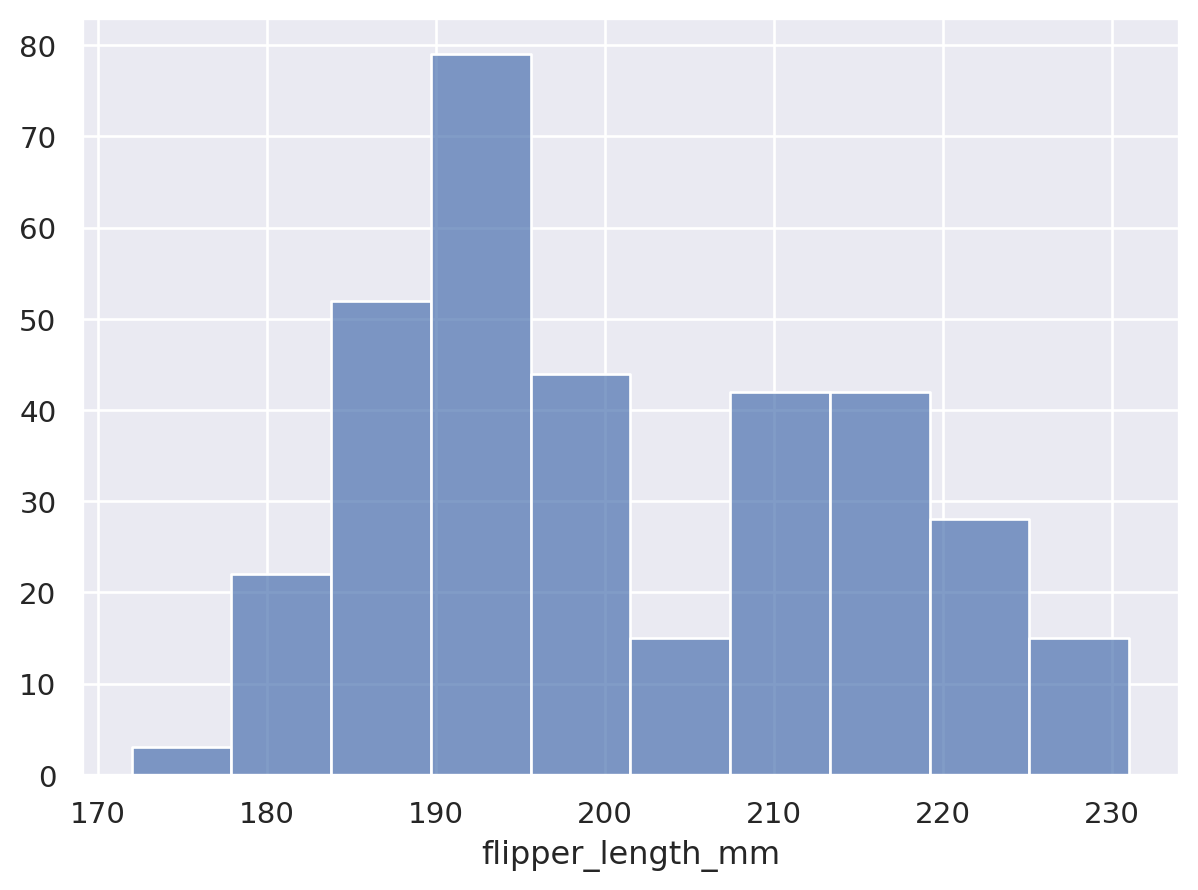

In [9]:
(
    so.Plot(data=penguins,x="flipper_length_mm")
    .add(so.Bars(),so.Hist())
)

**Estimaciones:**
- Valor mínimo ≈ 171
- Valor máximo ≈ 230
- Media ≈ 210
- Mediana ≈ 195

In [10]:
penguins["flipper_length_mm"].min()

172.0

In [11]:
penguins["flipper_length_mm"].max()

231.0

In [12]:
penguins["flipper_length_mm"].mean()

200.91520467836258

In [13]:
penguins["flipper_length_mm"].median()

197.0

Nada mal, jaja

## Ejercicio 8
Calcular datos estadísticos de bill_depth_mm

In [14]:
penguins["bill_depth_mm"].min()

17.3

In [15]:
penguins["bill_depth_mm"].max()

21.5

In [17]:
penguins["bill_depth_mm"].mean()

17.151169590643278

In [18]:
penguins["bill_depth_mm"].median()

17.3

Según lo observado en el ejercicio 4, estos valores varían dependiendo de la especie, representémoslo usando un BoxPlot

In [21]:
sns.boxplot(data=penguins,x="species",y="bill_depth_mm")

<Axes: xlabel='species', ylabel='bill_depth_mm'>

## Ejercicio 9
Rehacer el scatter-plot del ejercicio 4, modificando el tamaño de los puntos segun el peso de cada pinguino utilizando pointsize. ¿Qué se observa?

In [28]:
(
    so.Plot(penguins,"bill_depth_mm","bill_length_mm",color="species",pointsize="body_mass_g")
    .add(so.Dot())
).label(x="Profundidad del pico",y="Longitud del pico",color="Especie",pointsize="Masa del pingüino").layout(size=(6,6))

Se observa que los pingüinos Gentoo, que tienen menos profundidad de pico, son los más pesados. Verifiquémoslo con alguna visualización

In [30]:
sns.boxplot(data=penguins,x="species",y="body_mass_g")

<Axes: xlabel='species', ylabel='body_mass_g'>

## Ejercicio 10
Tenés datos de una encuesta realizada en distintas provincias de Argentina y querés saber cuántas personas respondieron a la encuesta en cada provincia. ¿Hacés un gráfico de líneas, de dispersión (scatter), histograma o un gráfico de barras (bar plot)? Hacé a mano en tu cuaderno cómo esperás que se vea el gráfico.

**Respuesta:** Yo haria un bar plot, que me mostraría con claridad, para la variable caregórica "provincia" cuántos registros hay de gente que haya respondido la encuesta

## Ejercicio 11

Estás estudiando la relación entre altura y peso de las personas. Tenés un data-set que tiene como variables la edad, sexo y peso de cada persona. Si querés describir estas variables por separado, ¿qué gráfico harías para cada una? ¿y si querés visualizar la relación entre peso y
altura? Hacé a mano en tu cuaderno cómo esperás que se vea el gráfico.

**Respuesta:**
- Para ver cuánta gente de cada sexo hay, usaría un Bar Plot, que me mostraría cuánta gente hay para cada sexo
- Para ver cuanta génte de distintos pesos hay, podría usar un Box Plot, que me indique donde esta la mediana de los pesos de la gente y los outliers
- Para ver las edades, creo que tambien sería conveniente usar un Box Plot, para ver de qué manera están distribuidos los datos

- Para visualizar la relación entre peso y altura, haría un Scatter Plot, ya que me indicaría donde se acumulan los puntos (lo esperable sería que a más altura las personas pesarían más)

## Ejercicio 12
Hacé un gráfico de barras que muestre la cantidad de países por continente según los datos de $\texttt{gapminder}$

a. ¿Cómo podemos hacerlo calculando primero las cantidades y después usando .add(so.Bar())? <br>
b. ¿Cómo podemos hacerlo utilizando so.Hist() para calcular las cantidades?

**Primera forma:**

In [35]:
paises_por_continente=gapminder.groupby("continent").nunique()["country"]

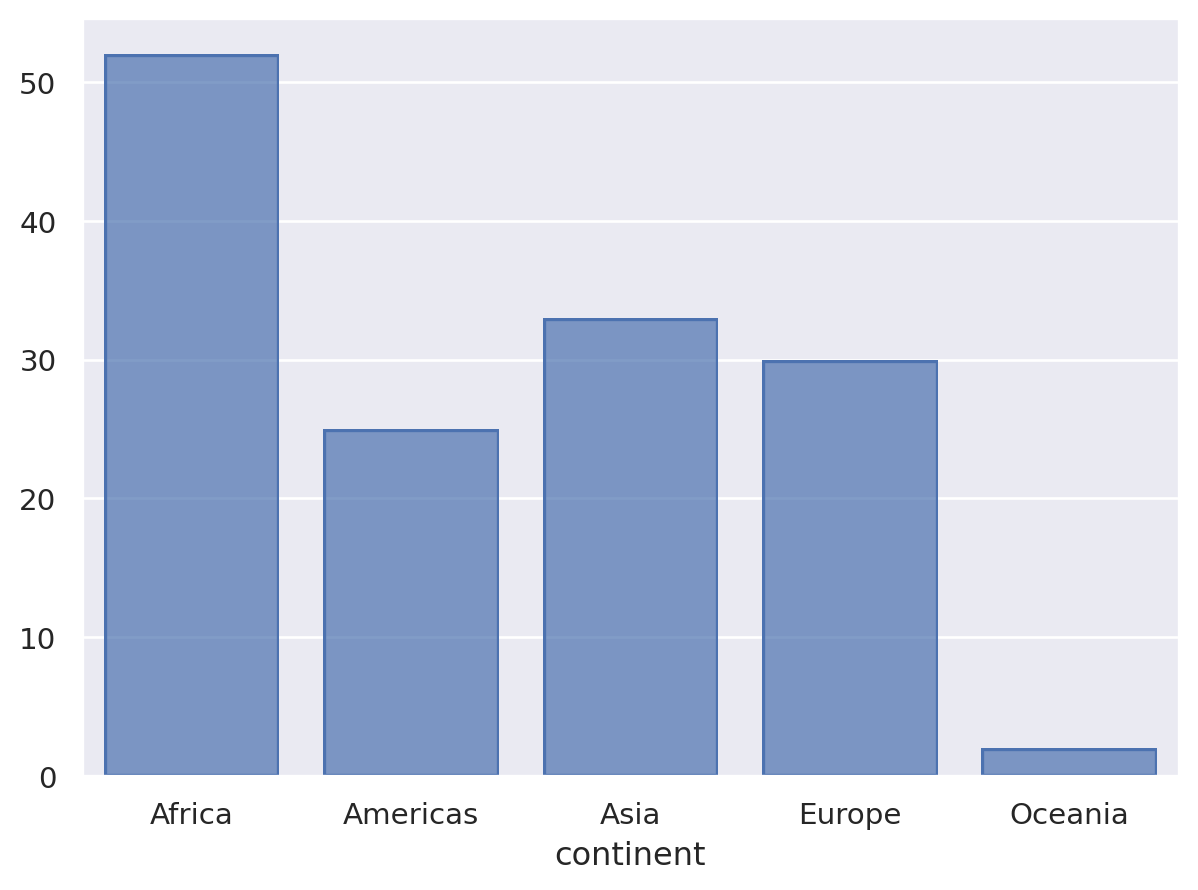

In [36]:
(
    so.Plot(x=paises_por_continente.index,y=paises_por_continente.values)
    .add(so.Bar())
)

**Segunda forma:**

In [39]:
(
    so.Plot(data=gapminder,x="continent")
    .add(so.Bar(),so.Hist())
)

## Ejercicio 13
Queremos investigar como varía la expectativa de vida en los respectivos continentes, para eso hacemos un Box Plot

In [45]:
gapminder["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

<Axes: xlabel='continent', ylabel='lifeExp'>

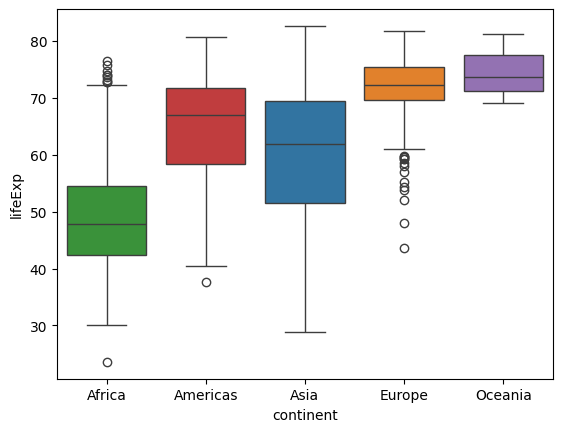

In [47]:
sns.boxplot(gapminder,x="continent",y="lifeExp",order=sorted(gapminder["continent"].unique()),hue="continent")